In [8]:
from tweepy import API
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import json
from datetime import datetime



from textblob import TextBlob

import twitter_credentials

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [9]:
# # # # TWITTER AUTHENTICATOR # # # #
# Creating the authentication object
auth = OAuthHandler(twitter_credentials.API_key,
                    twitter_credentials.API_key_secret)

# Setting your access token and secret
auth.set_access_token(twitter_credentials.Access_token,
                      twitter_credentials.Access_token_secret)

In [29]:
# ======================search methods===========================


# # API.search(q[, geocode][, lang][, locale][, result_type][, count][, until][, since_id][, max_id][, include_entities])
# # Creating the API object while passing in auth information
api = API(auth)

# # The search term you want to find
query = "Tesla"

# # Language code (follows ISO 639-1 standards)
language = "en"

# # The numbers of tweets per page, up to 100
count = 100

# # Calling the user_timeline function with our parameters
results = api.search(q=query, lang=language, count=count)

# create empty list to save multiple tweets which is type of json(dictionary)
list_of_json = [] 

# creating a counter
counter = 0


# for each through all tweets pulled
for tweet in results:
    df = pd.DataFrame(
        data=[tweet.text for tweet in results], columns=['tweets'])

    df['id'] = np.array([tweet.id for tweet in results])
    df['len'] = np.array([len(tweet.text) for tweet in results])
    df['date'] = np.array([tweet.created_at for tweet in results])
    df['source'] = np.array([tweet.source for tweet in results])
    df['likes'] = np.array([tweet.favorite_count for tweet in results])
    df['retweets'] = np.array([tweet.retweet_count for tweet in results])
   
        
    # printing the text stored inside the tweet object
    print(tweet.user.screen_name, "Tweeted:",
          tweet.text)
    counter += 1
    list_of_json.append(tweet)
    print('count: ============= ', counter)


orthereaboot Tweeted: @elonmusk @PPathole Perhaps hit one of the milestones in the deal- $tsla has hit none- before you brag about making… https://t.co/DCbJ8OM9ac
count: =============  1
HydeBlizzardbox Tweeted: RT @candies2639: Tesla reveals it got coronavirus bailout as Musk blasts stimulus package? Omg? Elon really needs help? Did Jeff Bezos get…
count: =============  2
7uWq0c1gDoLnwLq Tweeted: RT @vincent13031925: Will love to have this solar panel setup in my Tesla CyberTruck https://t.co/eXV2U0IPRW
count: =============  3
Sam_A_Stolt Tweeted: @FMSamadi @elonmusk If that's what you like. It's your life. VW group is probably the only legacy auto that has a c… https://t.co/KaeYRHJyH7
count: =============  4
jNewOrleans Tweeted: Tesla really about to be S&amp;P 500 😍
count: =============  5
PollsTesla Tweeted: Except for Tesla 🤔
😂😂😂😂😂
#Tesla https://t.co/j9vy0cEghb https://t.co/4377M6fIGx
count: =============  6
NeeceRaeLoveJoy Tweeted: RT @candies2639: Tesla reveals it got coronavir

rocobasilisk Tweeted: RT @ElonMuskNewsOrg: Tesla Gigafactory Texas shows its crazy potential in size comparison with other Tesla factories  https://t.co/lbftFcjk…
count: =============  59
EPavlic Tweeted: @elonmusk, when will #Croatia 🇭🇷 be available on the European country list for @Tesla web shop?
#Tesla https://t.co/PyKlV3EZm4
count: =============  60
jamierawsthorne Tweeted: Elon Musk surely has never been to a good rave in his life.... imagine being off your barnet and seeing Elon there… https://t.co/KjCkX0mqGu
count: =============  61
InsideEVs Tweeted: Fortunately, it seems everyone is okay, but the impact of this crash is extremely intense. Both cars cacth some air… https://t.co/dh3R5q9jtx
count: =============  62
rocobasilisk Tweeted: RT @TheLightSpeedz: Check Out the documented trip of my trip cross country! FIRST TIME TESLA MODEL 3 CROSS COUNTRY ROADTRIP! 1400 miles wit…
count: =============  63
Rik01553443 Tweeted: Korean video ,kona and model 3 compared , tesla wins by far

In [30]:
df

,tweets,id,len,date,source,likes,retweets
0,@elonmusk @PPathole Perhaps hit one of the mil...,1288817963290767361,140,2020-07-30 12:45:22,Twitter for iPhone,0,0
1,RT @candies2639: Tesla reveals it got coronavi...,1288817961453617153,139,2020-07-30 12:45:21,Twitter for Android,0,24
2,RT @vincent13031925: Will love to have this so...,1288817960941785088,108,2020-07-30 12:45:21,Twitter for Android,0,272
3,@FMSamadi @elonmusk If that's what you like. I...,1288817949760000000,140,2020-07-30 12:45:18,Twitter for Android,0,0
4,Tesla really about to be S&amp;P 500 😍,1288817904495067136,38,2020-07-30 12:45:08,Twitter for iPhone,0,0
...,...,...,...,...,...,...,...
95,RT @candies2639: Tesla reveals it got coronavi...,1288816455543328768,139,2020-07-30 12:39:22,Twitter for iPad,0,24
96,@CNBC And that's why Tesla being able to make ...,1288816450266791936,137,2020-07-30 12:39:21,Twitter Web App,0,0
97,@DenverDimo @rjward1775 @thesheetztweetz @elon...,1288816433296744448,140,2020-07-30 12:39:17,Twitter Web App,0,0
98,RT @candies2639: Tesla reveals it got coronavi...,1288816400933543937,139,2020-07-30 12:39:09,Twitter for Android,0,24


In [31]:
#  Sentiment analysis
# https://textblob.readthedocs.io/en/dev/quickstart.html#create-a-textblob
# TextBlob is a Python (2 and 3) library for processing textual data. 
# It provides a simple API for diving into common natural language processing (NLP) 
# tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """

    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def analyze_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))

        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1

tweet_analyzer = TweetAnalyzer()       
    
df['sentiment'] = np.array(
        [tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])

In [32]:
df.head()

,tweets,id,len,date,source,likes,retweets,sentiment
0,@elonmusk @PPathole Perhaps hit one of the mil...,1288817963290767361,140,2020-07-30 12:45:22,Twitter for iPhone,0,0,0
1,RT @candies2639: Tesla reveals it got coronavi...,1288817961453617153,139,2020-07-30 12:45:21,Twitter for Android,0,24,1
2,RT @vincent13031925: Will love to have this so...,1288817960941785088,108,2020-07-30 12:45:21,Twitter for Android,0,272,1
3,@FMSamadi @elonmusk If that's what you like. I...,1288817949760000000,140,2020-07-30 12:45:18,Twitter for Android,0,0,0
4,Tesla really about to be S&amp;P 500 😍,1288817904495067136,38,2020-07-30 12:45:08,Twitter for iPhone,0,0,1


In [34]:
# Get average length over all tweets:
print(np.mean(df['len']))

115.65


In [35]:
# Get the number of likes for the most liked tweet:
print(np.max(df['likes']))

31


In [36]:
# Get the number of retweets for the most retweeted tweet:
print(np.max(df['retweets']))

48871


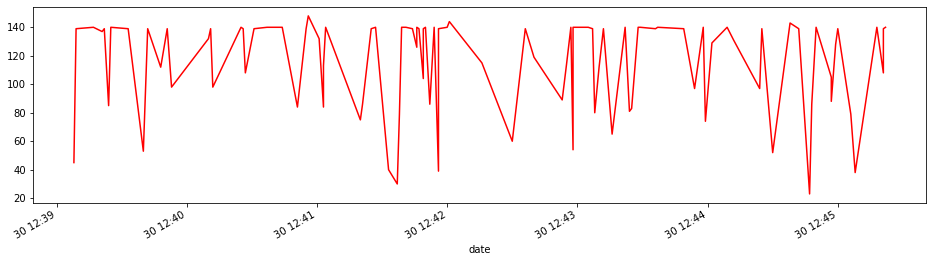

In [37]:
# Time Series
time_likes = pd.Series(data=df['len'].values, index=df['date'])
time_likes.plot(figsize=(16, 4), color='r')
plt.show()

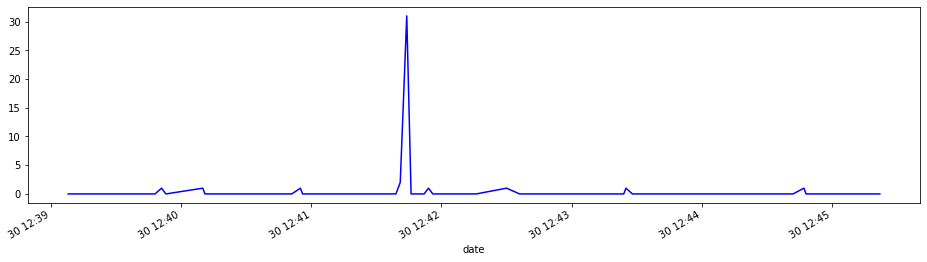

In [41]:
time_favs = pd.Series(data=df['likes'].values, index=df['date'])
time_favs.plot(figsize=(16, 4), color='b')
plt.show()


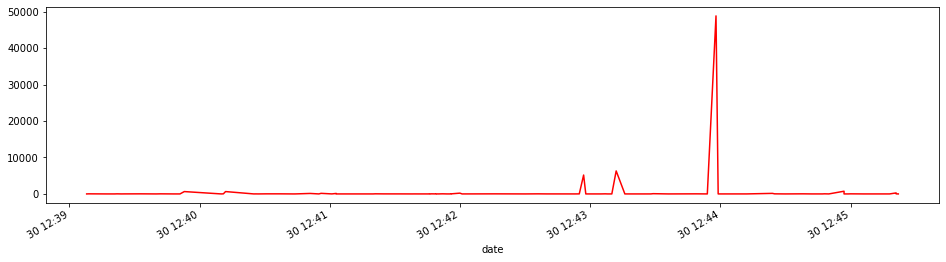

In [39]:
time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(16, 4), color='r')
plt.show()


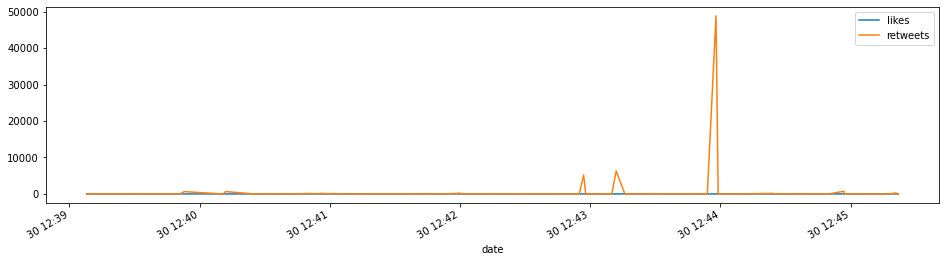

In [47]:
# Layered Time Series:
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16, 4), label="likes", legend=True)

time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(16, 4), label="retweets", legend=True)
plt.show()

In [53]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import csv
import re #regular expression
from textblob import TextBlob
import string
import preprocessor as p
import tweepy

In [54]:
#pass twitter credentials to tweepy
# Creating the authentication object
auth = OAuthHandler(twitter_credentials.API_key,
                    twitter_credentials.API_key_secret)

# Setting your access token and secret
auth.set_access_token(twitter_credentials.Access_token,
                      twitter_credentials.Access_token_secret)
api = tweepy.API(auth)

In [56]:
#declare file paths as follows for three files
tesla_tweets = "data/tesla_data.csv"
amazon_tweets = "data/amazon_data.csv"


In [57]:
#columns of the csv file
COLS = ['id', 'created_at', 'source', 'original_text','clean_text', 'sentiment','polarity','subjectivity', 'lang',
'favorite_count', 'retweet_count', 'original_author',   'possibly_sensitive', 'hashtags',
'user_mentions', 'place', 'place_coord_boundaries']

In [58]:
#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

In [59]:
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

In [60]:
#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

In [61]:
#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [62]:
def clean_tweets(tweet):
 
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
#after tweepy preprocessing the colon symbol left remain after      #removing mentions
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
#replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
#remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)
#filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []
#looping through conditions
    for w in word_tokens:
#check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in emoticons and w not in string.punctuation:
            filtered_tweet.append(w)
    return ' '.join(filtered_tweet)
    #print(word_tokens)
    #print(filtered_sentence)return tweet

In [87]:
def write_tweets(keyword, file):
    #If the file exists, then read the existing data from the CSV file.
    if os.path.exists(file):
        df = pd.read_csv(file, header=0)
    else:
        df = pd.DataFrame(columns=COLS)
    #page attribute in tweepy.cursor and iteration
    for page in tweepy.Cursor(api.search, q=keyword,
                              count=200, include_rts=False):
                              
        for status in page:
            new_entry = []
            status = status._json
        if status['lang'] != 'en':
                continue
        if status['created_at'] in df['created_at'].values:
            i = df.loc[df['created_at'] == status['created_at']].index[0]
        if status['favorite_count'] != df.at[i, 'favorite_count'] or \
        status['retweet_count'] != df.at[i, 'retweet_count']:
            df.at[i, 'favorite_count'] = status['favorite_count']
            df.at[i, 'retweet_count'] = status['retweet_count']
        continue  
        
        filtered_tweet=clean_tweets(status['text'])
        
        blob = TextBlob(filtered_tweet)
        Sentiment = blob.sentiment     
        polarity = Sentiment.polarity
        subjectivity = Sentiment.subjectivity

NameError: name 'filtered_tweet' is not defined